In [2]:
#Importing the required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the data from dataset downloaded from Kaggle
df = pd.read_csv(r"C:\Users\heyit\Desktop\Airline Data\Indian Airlines.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


About the dataset:

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [4]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [5]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


That means :
1) In airline column there are 6 unique airlines
2) In source_city there are 6 unique cities as well as in destination city column also
3) In arrival and departure columns there are 6 different timings
4) In class column there are economic and business classes

The ticket price is mostly depends on time ,source and destination cities ,class, type of airlines and stops

[Text(0.5, 0, 'Airline in India'),
 Text(0, 0.5, 'No. of flights'),
 Text(0.5, 1.0, 'No. of flight by Airlines')]

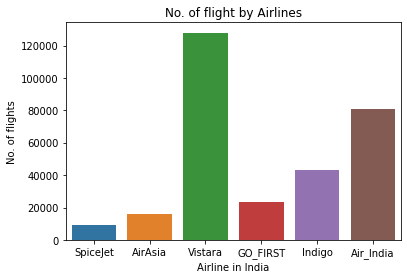

In [12]:
from turtle import title
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airline in India', ylabel='No. of flights', title='No. of flight by Airlines')


[Text(0.5, 0, 'Ticket cost'),
 Text(0, 0.5, 'Class of Travel'),
 Text(0.5, 1.0, 'Price range according to Class of Ticket')]

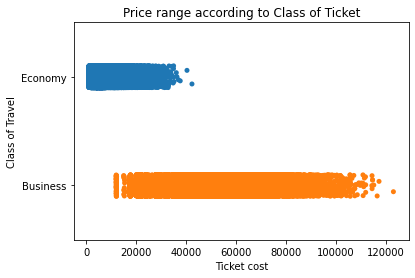

In [13]:
from turtle import title
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price range according to Class of Ticket')

[Text(0.5, 0, 'Class of Travel'),
 Text(0.5, 1.0, 'Availability of Tickets according to Class of Travel')]

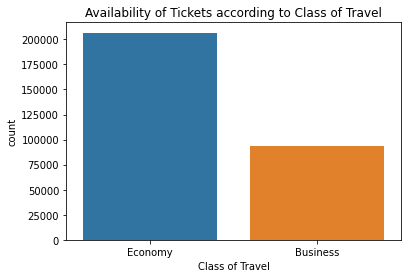

In [15]:
from turtle import title
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Class of Travel', title='Availability of Tickets according to Class of Travel')

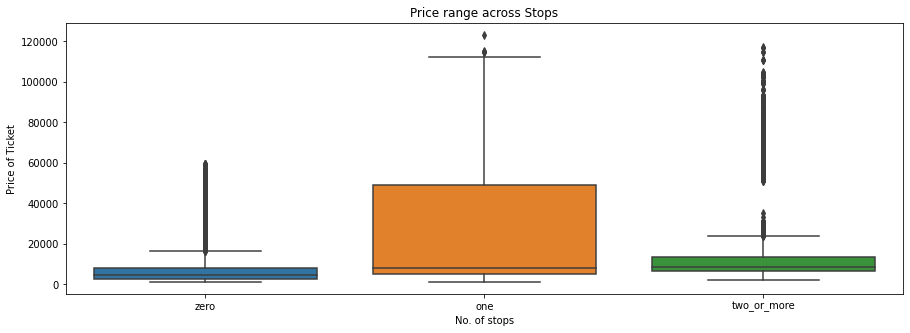

In [22]:
plt.figure(figsize=(15,5))
S = sns.boxplot(x='stops', y='price', data=df)
S.set(xlabel='No. of stops', ylabel='Price of Ticket', title='Price range across Stops')
plt.show(S)

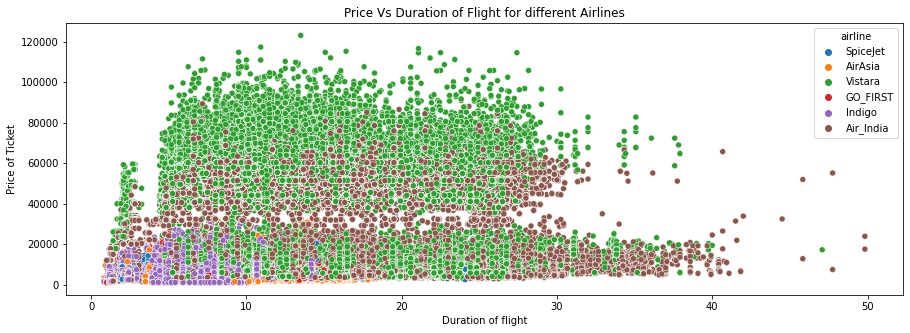

In [24]:
plt.figure(figsize=(15,5))
PD = sns.scatterplot(df['duration'], df['price'], hue= df['airline'])
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Price Vs Duration of Flight for different Airlines')
plt.show(PD)

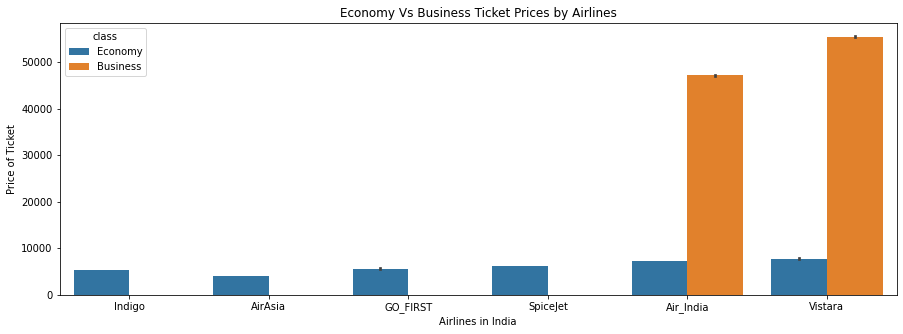

In [26]:
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

[Text(0.5, 1.0, 'Airline ticket prices based on business class'),
 Text(0.5, 0, 'Airlines'),
 Text(0, 0.5, 'Price of Ticket')]

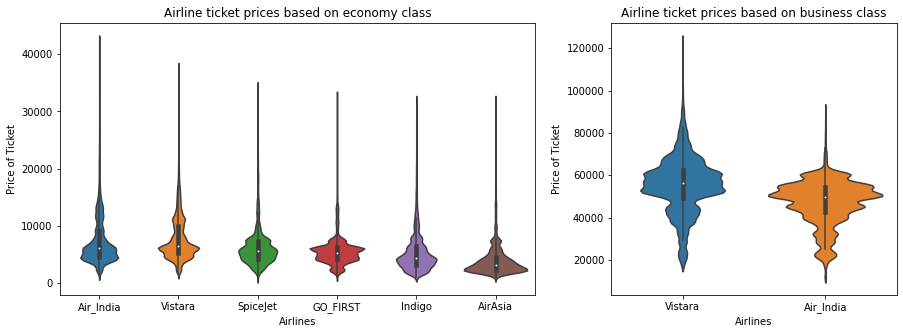

In [33]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(15, 5))
sns.violinplot(y='price', x='airline', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending = False), kind='boxen', ax=axs[0])
axs[0].set(title='Airline ticket prices based on economy class', xlabel='Airlines', ylabel='Price of Ticket')
sns.violinplot(y='price', x='airline', data = df.loc[df['class'] == 'Business'].sort_values('price', ascending = False), kind = 'boxen', ax=axs[1])
axs[1].set(title='Airline ticket prices based on business class', xlabel='Airlines', ylabel='Price of Ticket') 


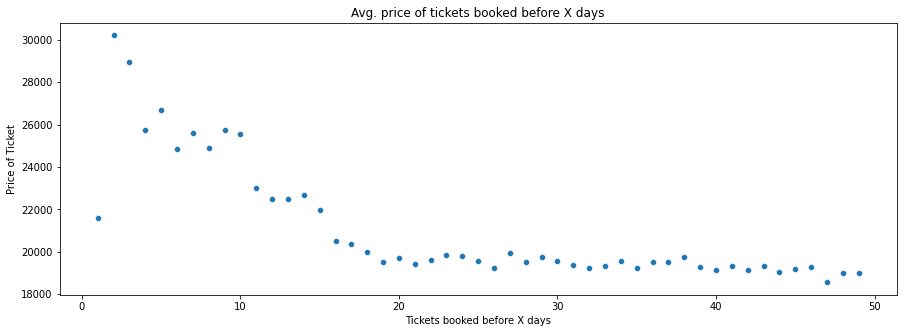

In [37]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
DP = sns.scatterplot(y='price', x='days_left', data = df_temp)
DP.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Avg. price of tickets booked before X days')
plt.show(DP)